In [75]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("input/"))

from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier

## Keras imports
from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout,LSTM
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding,Conv1D,Dropout,GlobalMaxPool1D,Dense,Activation
import tensorflow as tf

# Any results you write to the current directory are saved as output.

## Visualization Library
from IPython.display import display
import matplotlib.pyplot as plt

['test.csv', 'sample_submission.csv', 'santander-customer-transaction-prediction.zip', 'train.csv']


In [2]:
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')
sample_sub = pd.read_csv('input/sample_submission.csv')

In [3]:
sample_sub.head()

,ID_code,target
0,test_0,0
1,test_1,0
2,test_2,0
3,test_3,0
4,test_4,0


In [3]:
print(train.head())
print("==")
print(train.shape)
print("===")
print(test.head())
print("==")
print(test.shape)

   ID_code  target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
0  train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187   
1  train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
2  train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   
3  train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428   
4  train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405   

     var_7   ...     var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.6266   ...      4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   
1  16.5338   ...      7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   
2  14.6155   ...      2.9057   9.7905   1.6704   1.6858  21.6042   3.1417   
3  14.9250   ...      4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706   
4  19.2514   ...     -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   

   var_196  var_197  var_198  var_199  
0   7.8784

In [4]:
train['target'].value_counts(normalize=True)

0    0.89951
1    0.10049
Name: target, dtype: float64

In [ ]:
# pd.isnull(train).sum()

In [5]:
independent_feat = ['var_'+str(i) for i in range(200)]
dependent_feat = 'target'

In [6]:
train[independent_feat].describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,7.567236,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,1.235070,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,3.970500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,6.618800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,7.629600,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,8.584425,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,11.150600,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [8]:
train[independent_feat].head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [9]:
sc = StandardScaler()
train[independent_feat] = sc.fit_transform(train[independent_feat])
test[independent_feat] = sc.transform(test[independent_feat])

In [10]:
train, val = train_test_split(train, test_size=0.20, stratify=train[dependent_feat])
print(train.shape)
print(val.shape)

(160000, 202)
(40000, 202)


In [11]:
train[dependent_feat].value_counts(normalize=True)

0    0.899513
1    0.100487
Name: target, dtype: float64

### MLP

In [58]:
def plot_history(history):
    auc = history.history['get_auc']
    val_auc = history.history['val_get_auc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(auc) + 1)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, auc, 'b', label='Training AUC')
    plt.plot(x, val_auc, 'r', label='Validation AUC')
    plt.title('Training and validation AUC')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

def get_auc(y_true, y_pred):
    print("True value {}".format(y_true))
    print("Predicted value {}".format(y_pred))
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc

In [17]:
import os
os.listdir('output/')

['output.csv']

In [96]:
## Define Model
input_shape = len(independent_feat)

def mlp_v1():
    model = Sequential()
    ## input layer
    model.add(Dense(256, input_dim=input_shape, activation='relu'))
    model.add(Dense(256, input_dim=input_shape, activation='relu'))
    ## 4 Hidden Layer
    model.add(Dense(200, activation='relu'))
    model.add(Dense(160, activation='relu'))
    model.add(Dense(120, activation='relu'))
    model.add(Dense(80, activation='relu'))
    ## output layer
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adadelta',metrics=[get_auc])
    print(model.summary())
    return model

def lstm_v1():
    model = Sequential()
    model.add(LSTM(256, return_sequences=False,input_shape= (len(independent_feat),1)))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adadelta',metrics=[get_auc])
    print(model.summary())
    return model

In [81]:
mode_path = 'output/mlp_v1.h5'
callbacks = [ModelCheckpoint(filepath=mode_path, save_best_only=True)]

In [106]:
np.array(train[independent_feat])

array([[ 0.40864081, -0.08342604,  0.23810485, ..., -0.31754592,
         0.9743076 , -0.45059092],
       [-1.88658968,  0.50730973,  0.41440921, ...,  0.74481885,
         0.61030143, -0.45025561],
       [-0.44460362, -1.54684583,  0.85778287, ..., -0.27880992,
         0.13041775,  0.74827985],
       ...,
       [ 2.16799077, -0.92272762,  0.38574461, ..., -0.37809128,
         0.90246952,  1.01372371],
       [-0.47878077, -0.05043866,  0.02639573, ...,  2.21266387,
        -0.21777939,  0.14895943],
       [ 0.50011977, -1.47116746,  0.51812434, ..., -0.13656089,
        -0.43628273, -1.54600307]])

In [107]:
## Run Model
print("Compile model ...")
estimator = KerasClassifier(build_fn=mlp_v1, epochs=20, batch_size=64)
history = estimator.fit(train[independent_feat], train[dependent_feat],\
                        validation_data=(val[independent_feat],val[dependent_feat]),callbacks=callbacks)

Compile model ...
True value Tensor("dense_60_target:0", shape=(?, ?), dtype=float32)
Predicted value Tensor("dense_60/Sigmoid:0", shape=(?, 1), dtype=float32)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 256)               51456     
_________________________________________________________________
dense_55 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_56 (Dense)             (None, 200)               51400     
_________________________________________________________________
dense_57 (Dense)             (None, 160)               32160     
_________________________________________________________________
dense_58 (Dense)             (None, 120)               19320     
_________________________________________________________________
dense_59 (Dense)             (None, 80)         

KeyboardInterrupt: 

#### LSTM

In [121]:
def get_lstm_data(data):
    return data[independent_feat].values.reshape(data.shape[0],len(independent_feat),1)


train_lstm = get_lstm_data(train[independent_feat])
val_lstm = get_lstm_data(val[independent_feat])
test_lstm = get_lstm_data(test[independent_feat])

In [122]:
mode_path = 'output/lstm_v1.h5'
callbacks = [ModelCheckpoint(filepath=mode_path, save_best_only=True)]

In [123]:
## Run Model
print("Compile model ...")
estimator = KerasClassifier(build_fn=lstm_v1, epochs=20, batch_size=64)
history = estimator.fit(train_lstm, train[dependent_feat],\
                        validation_data=(val_lstm,val[dependent_feat]),callbacks=callbacks)

Compile model ...
True value Tensor("dense_64_target:0", shape=(?, ?), dtype=float32)
Predicted value Tensor("dense_64/Sigmoid:0", shape=(?, 1), dtype=float32)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 256)               264192    
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_64 (Dense)             (None, 1)                 257       
Total params: 264,449
Trainable params: 264,449
Non-trainable params: 0
_________________________________________________________________
None
Train on 160000 samples, validate on 40000 samples
Epoch 1/20
160000/160000 [==============================] - 948s 6ms/step - loss: 0.3282 - get_auc: 0.5151 - val_loss: 0.3302 - val_get_auc: 0.5234
Epoch 2/20
147648/160000 [==========

KeyboardInterrupt: 

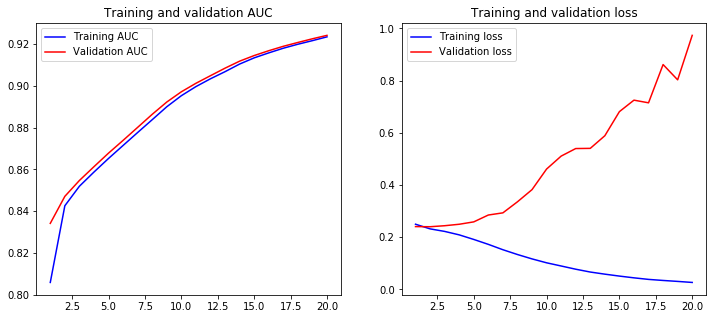

In [68]:
plot_history(history)

In [69]:
# https://github.com/keras-team/keras/issues/5916
model = load_model(mode_path,custom_objects={'get_auc':get_auc})

True value Tensor("dense_37_target_2:0", shape=(?, ?), dtype=float32)
Predicted value Tensor("dense_37_2/Sigmoid:0", shape=(?, 1), dtype=float32)


In [70]:
train_pred = model.predict_proba(train[independent_feat])
val_pred = model.predict_proba(val[independent_feat])

train_pred = [i[0] for i in train_pred]
val_pred = [i[0] for i in val_pred]

In [71]:
from sklearn.metrics import roc_auc_score
print("Train auc {}".format(roc_auc_score(train[dependent_feat],train_pred)))
print("Val auc {}".format(roc_auc_score(val[dependent_feat],val_pred)))

Train auc 0.8786654902544022
Val auc 0.8525228256991859


In [ ]:
result = pd.DataFrame({'ID_code':test['ID_code'],'target':list(test_pred)})
result.head()

In [ ]:
result.to_csv('output/mlp_v1.csv',index=False)

### References

1) https://github.com/keras-team/keras/issues/5916
2) 